1. csv 폴더에서 Sales Records.csv 파일 로드
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼 제거
3. 컬럼의 이름들 변경 ->['대륙', '국가', '상품 종류', '우선 순위', '주문 일자', '발송 일자', '판매 개수', '단가', '원가']
4. 데이터의 결측치 존재 여부 파악
5. 대륙, 국가를 기준으로 오름차순 정렬
6. 인덱스 재지정(기존 인덱션 제거)
7. 새로운 파생 변수 생성
    - 총 단가 : '판매 개수' * '단가'
    - 총 원가 : '판매 개수' * '원가'
    - 총 이유 : '총 단가' - '총 원가'

In [2]:
import pandas as pd

In [3]:
# Sales Records csv 파일 로드
sales = pd.read_csv('../../../../바탕 화면/Data/csv/Sales Records.csv')

In [4]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [5]:
# 특정 컬럼제거
sales.drop(['Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel'],
            axis = 1,
              inplace = True
)

In [6]:
# 컬럼의 이름 변경
sales.columns = ['대륙', '국가', '상품 종류', '우선 순위', '주문 일자', '발송 일자', '판매 개수', '단가', '원가']

In [7]:
sales.head(1)

,대륙,국가,상품 종류,우선 순위,주문 일자,발송 일자,판매 개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [8]:
# 결측치 확인
## DataFrame의 info 출력
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대륙      10000 non-null  object 
 1   국가      10000 non-null  object 
 2   상품 종류   10000 non-null  object 
 3   우선 순위   10000 non-null  object 
 4   주문 일자   10000 non-null  object 
 5   발송 일자   10000 non-null  object 
 6   판매 개수   10000 non-null  int64  
 7   단가      10000 non-null  float64
 8   원가      10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [9]:
## 통계 요약 정보를 출력
sales.describe()

,판매 개수,단가,원가
count,10000.000000,10000.000000,10000.000000
mean,5002.855900,268.143139,188.806639
std,2873.246454,217.944092,176.445907
min,2.000000,9.330000,6.920000
25%,2530.750000,109.280000,56.670000
50%,4962.000000,205.700000,117.110000
75%,7472.000000,437.200000,364.690000
max,10000.000000,668.270000,524.960000


In [10]:
## 컬럼별 결측치의 수 출력
sales.isna().sum()

대륙       0
국가       0
상품 종류    0
우선 순위    0
주문 일자    0
발송 일자    0
판매 개수    0
단가       0
원가       0
dtype: int64

In [11]:
## 데이터 백업
df = sales.copy()

In [12]:
df.head(1)

,대륙,국가,상품 종류,우선 순위,주문 일자,발송 일자,판매 개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [13]:
# 오름차순 정렬
df.sort_values(['대륙', '국가'],
               inplace = True
)

In [14]:
# 인덱스 초기화
df.reset_index(drop = True, inplace = True)

In [15]:
# 파생 변수 생성
## 총 단가
df['총 단가'] = df['판매 개수'] * df['단가']

df.head(3)

,대륙,국가,상품 종류,우선 순위,주문 일자,발송 일자,판매 개수,단가,원가,총 단가
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04


In [16]:
## 총 원가
df['총 원가'] = df['판매 개수'] * df['원가']

## 총 이윤
df['총 이윤'] = df['총 단가'] - df['총 원가']

In [17]:
df.head(3)

,대륙,국가,상품 종류,우선 순위,주문 일자,발송 일자,판매 개수,단가,원가,총 단가,총 원가,총 이윤
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42


1. 대륙별 총 이윤의 합이 가장 높은 대륙
2. 국가별 총 이윤의 합 상위 10개국
3. 가장 많이 팔린 상품

In [18]:
# 대륙별 총 이윤 합
## 그룹화
## 그룹화 함수 : groupby([기준이 되는 칼럼])
### case1 : 전체 DataFrame에서 그룹화 -> 컬럼 필터링
df.groupby(
    ['대륙']
).sum()[['총 이윤']]

,총 이윤
대륙,
Asia,5.874033e+08
Australia and Oceania,3.240712e+08
Central America and the Caribbean,4.033578e+08
Europe,1.027000e+09
Middle East and North Africa,5.099239e+08
North America,9.949552e+07
Sub-Saharan Africa,9.996421e+08


In [19]:
### case2 : 전체 DataFrame에서 컬럼 필터링 -> 그룹화
group_data = df[['대륙', '총 이윤']].groupby(['대륙']).sum()

In [20]:
# 가장 높은 대륙
group_data.sort_values(['총 이윤'], ascending = False).head(1)

,총 이윤
대륙,
Europe,1.027000e+09


In [21]:
## 국가별 총 이윤 합
group_data2 = df[['국가', '총 이윤']].groupby(['국가']).sum()



In [22]:
## 상위 10개국
group_data2.sort_values(['총 이윤'], ascending = False, inplace = True)

In [23]:
group_data2.head(10)

,총 이윤
국가,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
Botswana,29019726.67
Bangladesh,28092720.77
Lithuania,28063374.02
Burundi,27911293.45


In [24]:
# South Korea의 등수
## case1 : index는 list -> list 내장 함수(index()) 사용
indexs = list(group_data2.index)
indexs.index('South Korea')+1

48

In [25]:
## case2 : 인덱스 초기화(기존 인덱스 유지)
group_data3 = group_data2.reset_index()

group_data3.loc[
    group_data3['국가'] == 'South Korea'
]

,국가,총 이윤
47,South Korea,23893933.75


In [28]:
## 많이 팔린 상품

# 그룹화 연산
group_data4 = df[['상품 종류', '판매 개수']].groupby(['상품 종류']).sum()

In [29]:
group_data4.sort_values(['판매 개수'], ascending = False)

,판매 개수
상품 종류,
Personal Care,4402827
Clothes,4352350
Household,4336803
Vegetables,4238098
Cereal,4203394
Baby Food,4197006
Snacks,4122781
Office Supplies,4120263
Cosmetics,4103290


In [36]:
# 그룹화를 할 컬럼이 2 개 이상인 경우
df[
    ['국가', '상품 종류', '판매 개수']
    ].groupby(
        ['국가', '상품 종류']
    ).agg(['sum', 'count'])

판매 개수      
                               sum count
국가          상품 종류                       
Afghanistan Baby Food         1368     1
            Beverages        14380     3
            Cereal           54917     9
            Clothes          29887     5
            Cosmetics        12177     4
...                            ...   ...
Zimbabwe    Meat              9640     1
            Office Supplies  17447     4
            Personal Care    18478     2
            Snacks           16314     3
            Vegetables       33945     5

[2198 rows x 2 columns]

In [45]:
# pivot_table()
## pandas에 내장된 함수
pd.pivot_table(
    df,
    index = '국가',
    columns = '상품 종류',
    values = '판매 개수',
    aggfunc = 'sum',
    margins = True,
    fill_value = 0
)

상품 종류,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables,All
국가,,,,,,,,,,,,,
Afghanistan,1368,14380,54917,29887,12177,15791,32221,39330,18338,18899,26466,24832,288606
Albania,25985,22109,18580,30199,20375,26785,23705,28387,12623,35973,9154,11462,265337
Algeria,36393,10330,32498,21002,30506,17578,8482,15915,25956,24629,21037,21186,265512
Andorra,17592,22132,22618,6296,16156,41365,12839,14747,29795,42303,18764,6628,251235
Angola,36948,20666,34274,11404,22465,29812,8305,22134,5879,30464,51486,14129,287966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,25450,7981,20189,17880,14571,20686,26646,47200,31262,32229,30201,25822,300117
Yemen,22672,25690,15503,21235,7238,24168,31091,15098,6335,41380,15054,18350,243814
Zambia,51886,9825,21888,16282,22115,34906,24334,23886,30959,23469,28108,0,287658


In [50]:
pivot_data = pd.pivot_table(
    df,
    index = '대륙',
    values = '총 이윤',
    aggfunc = 'sum',
    margins = True,
    fill_value = 0
)

In [ ]:
pivot_data.plot(kind='bar')

In [ ]:
group_data.plot(kind='bar')

In [54]:
import matplotlib.pyplot as plt

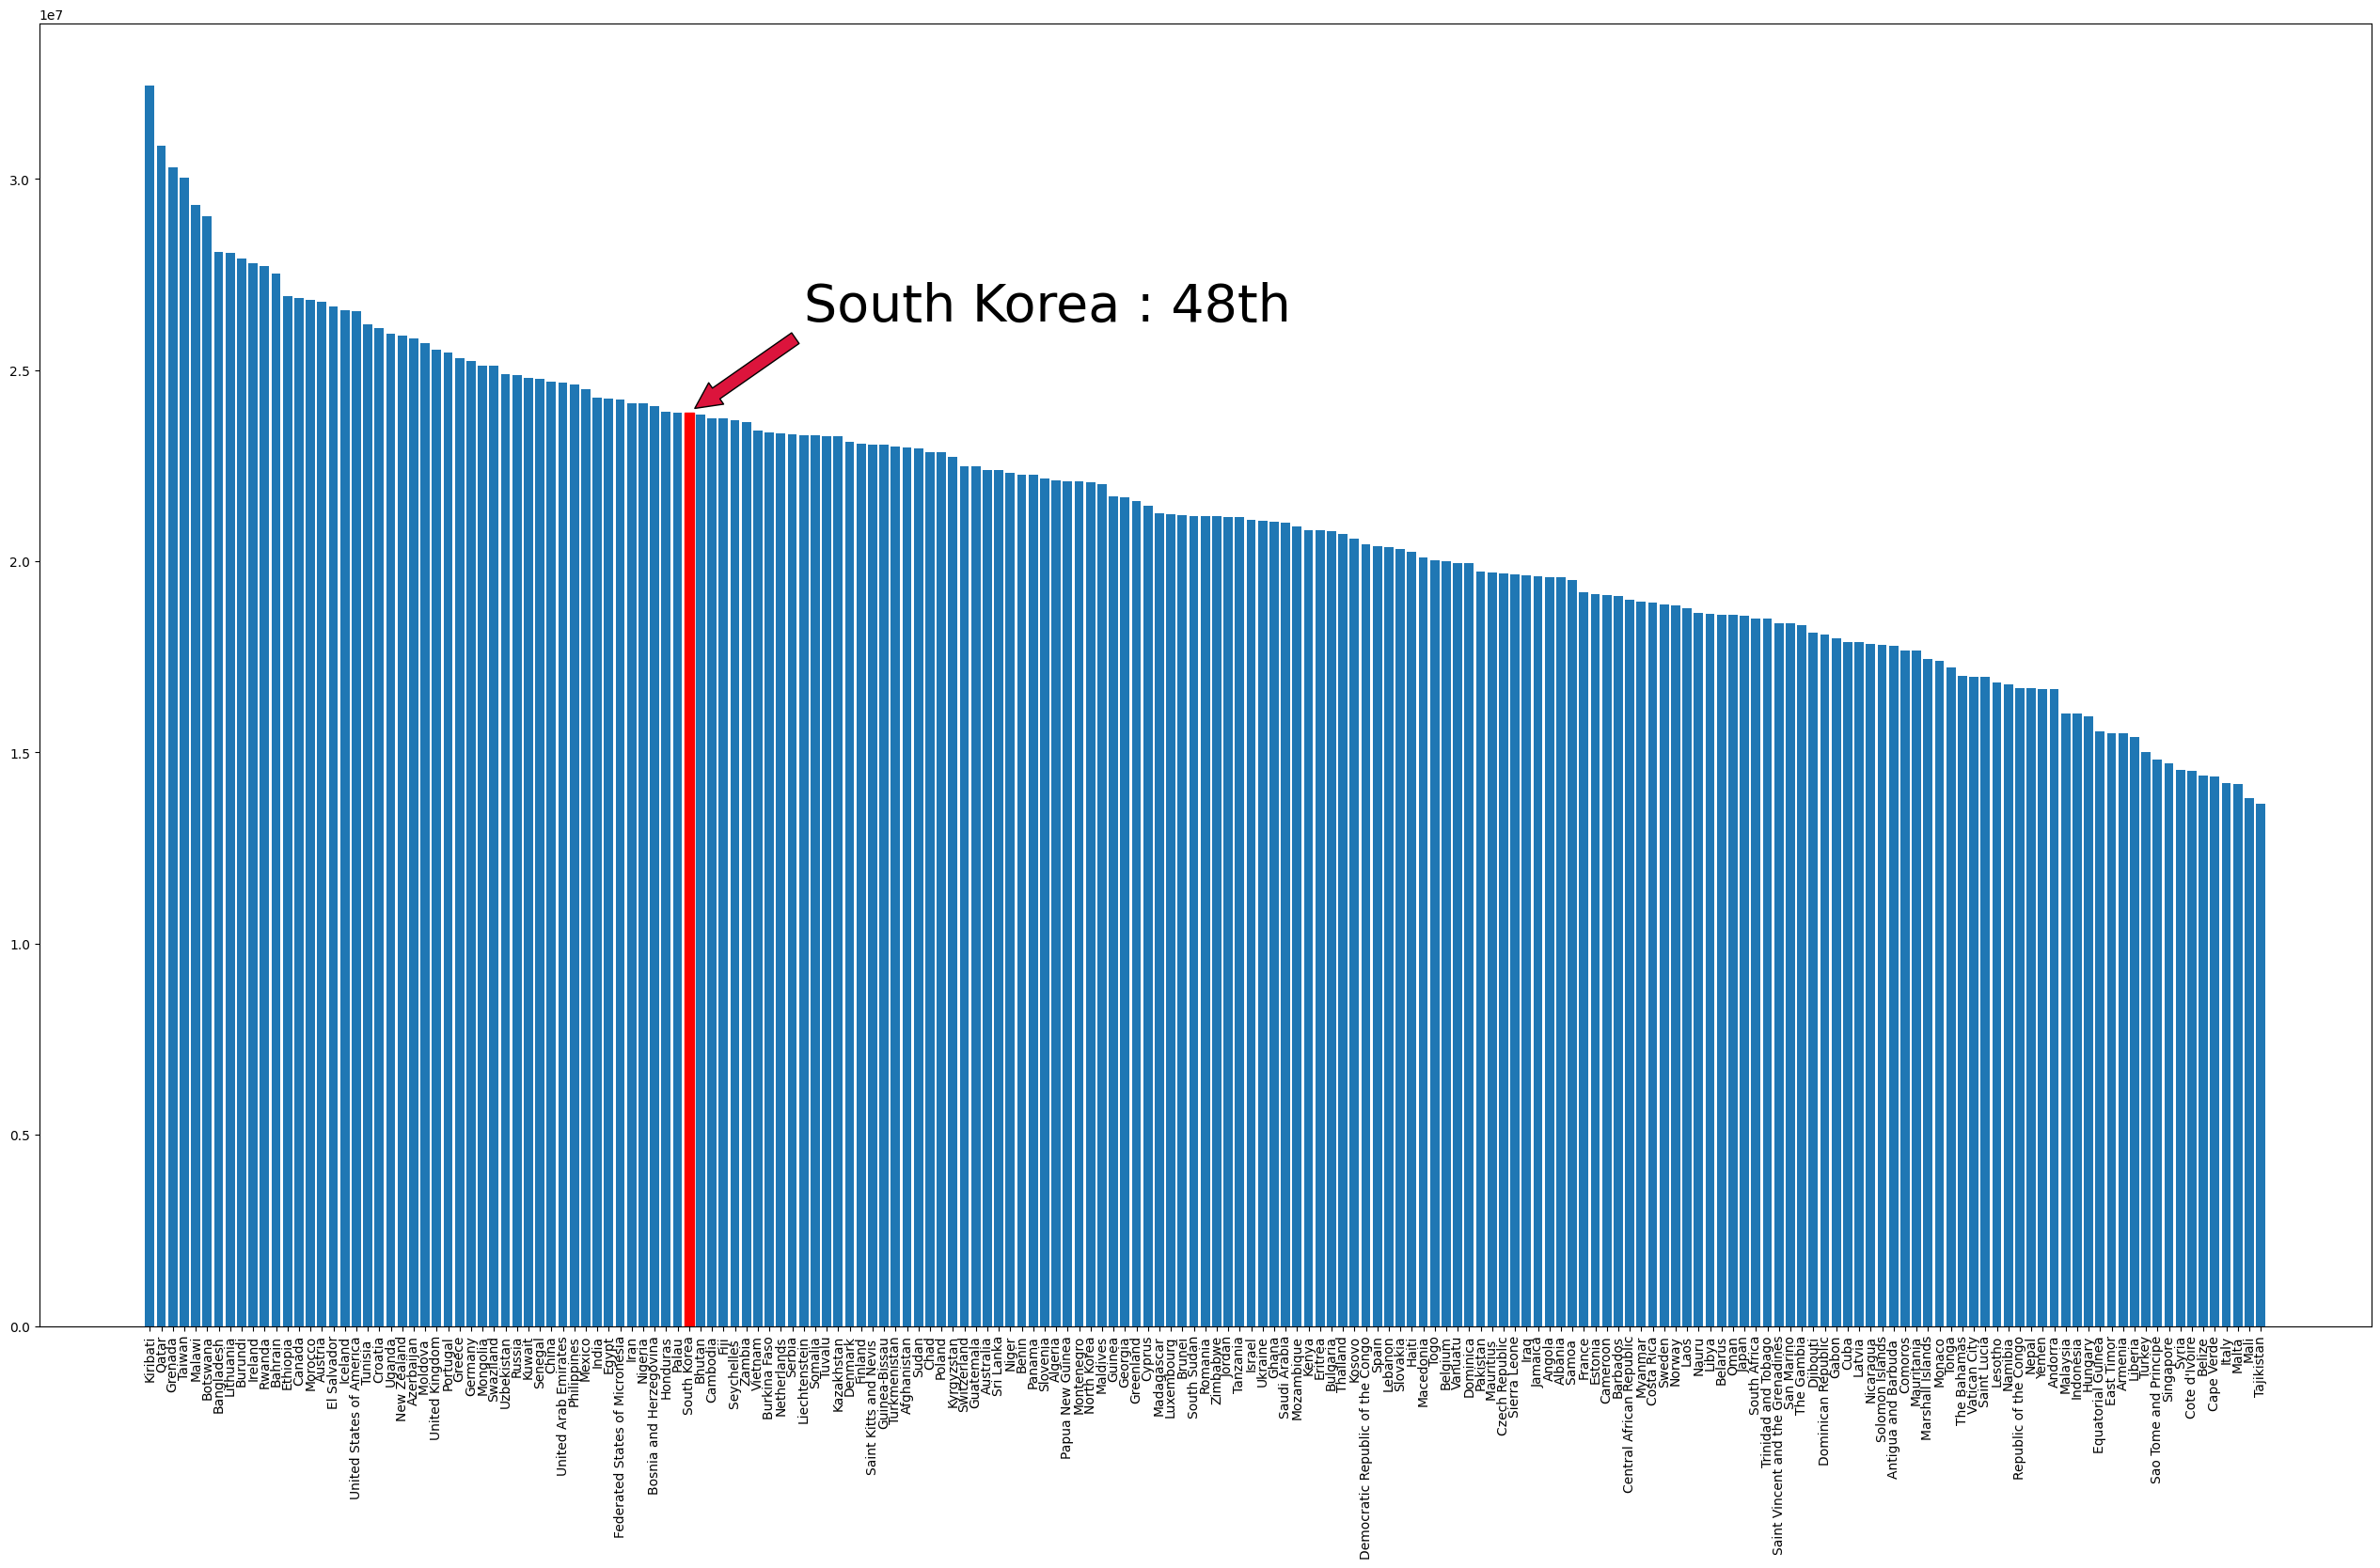

In [79]:
## goup_data2 그래프 생성
# 막대 그래프 생성
x = group_data2.index
y = group_data2['총 이윤']

korea_rank = list(group_data2.index).index('South Korea')
korea_value = group_data2.loc['South Korea', '총 이윤']


# 그래프의 사이즈를 변경
plt.figure(figsize=(32,18))
graph=plt.bar(x,y)
graph[korea_rank].set_color('r')
# x축의 데이터들을 회전
plt.xticks(rotation = 90)
# 그래프에 주석 추가
plt.annotate(
    f"South Korea : {korea_rank+1}th",
    xy = (korea_rank, korea_value),             # 화살표 지정되는 좌표
    xytext=(korea_rank +10, korea_value*1.1),   # 주석의 좌표
    arrowprops={
        'facecolor' : 'crimson',
        'edgecolor' : 'k',
        'headwidth' : 20,
        'headlength' : 20,
        'width' : 10,
        'shrink' : 0.05
    },
    fontsize= 40

)
plt.show()